# Building a generator network

In [ ]:
raise SystemExit("Stop right there!");

In [1]:
# Warnings
import warnings

# System
import os

# Mathematical operations and data manipulation
from numpy.random import randn

# Modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
# Define the input features and output features
infeats = 10
outfeats = 2

In [4]:
# Generate a batch of random numbers
batch = 128
genInput = randn(infeats * batch)

In [5]:
# Reshape the data
genInput = genInput.reshape(batch, infeats)
print(genInput.shape)

(128, 10)


In [6]:
# Defining the Generator model
Genmodel = Sequential()
Genmodel.add(
    Dense(
        32,
        activation="linear",
        kernel_initializer="he_uniform",
        input_dim=infeats,
    )
)
Genmodel.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
Genmodel.add(Dense(64, activation="elu", kernel_initializer="he_uniform"))
Genmodel.add(Dense(32, activation="elu", kernel_initializer="he_uniform"))
Genmodel.add(Dense(32, activation="selu", kernel_initializer="he_uniform"))
Genmodel.add(Dense(outfeats, activation="selu"))

In [7]:
# Defining the summary of the network
Genmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
______________________________________________________

In [8]:
# Generating fake samples from network
fakeSamps = Genmodel.predict(genInput)
fakeSamps.shape

(128, 2)

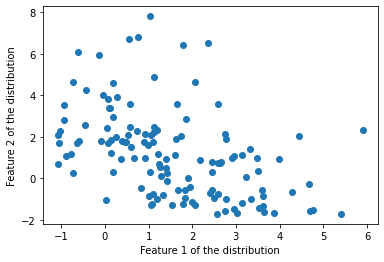

In [9]:
# Plotting the fake distribution
plt.scatter(fakeSamps[:, 0], fakeSamps[:, 1])
plt.xlabel("Feature 1 of the distribution")
plt.ylabel("Feature 2 of the distribution")
plt.show()